# Experimentation
* Data 2000

In [1]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import KFold
%matplotlib inline
%run -i ../../tools/predict_functions.py
%run -i ../../tools/label_encoder.py

____

In [2]:
data_2000 = pd.read_csv('../../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2000_1.csv', delimiter=';')

Sort by column and split the Data into X and Y

In [3]:
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
X_list = data_2000.columns.difference(y_list)
S_data = data_2000.sort_values(by='PUNT_BIOLOGIA')
X = S_data.filter(items = X_list)
Y = S_data.filter(items = y_list)

# BIOLOGY
#### Try with KFOLD = 5
Create the Kfold, the Linear Model and make the predictions and the plots

Mean Score: 5.10118488268


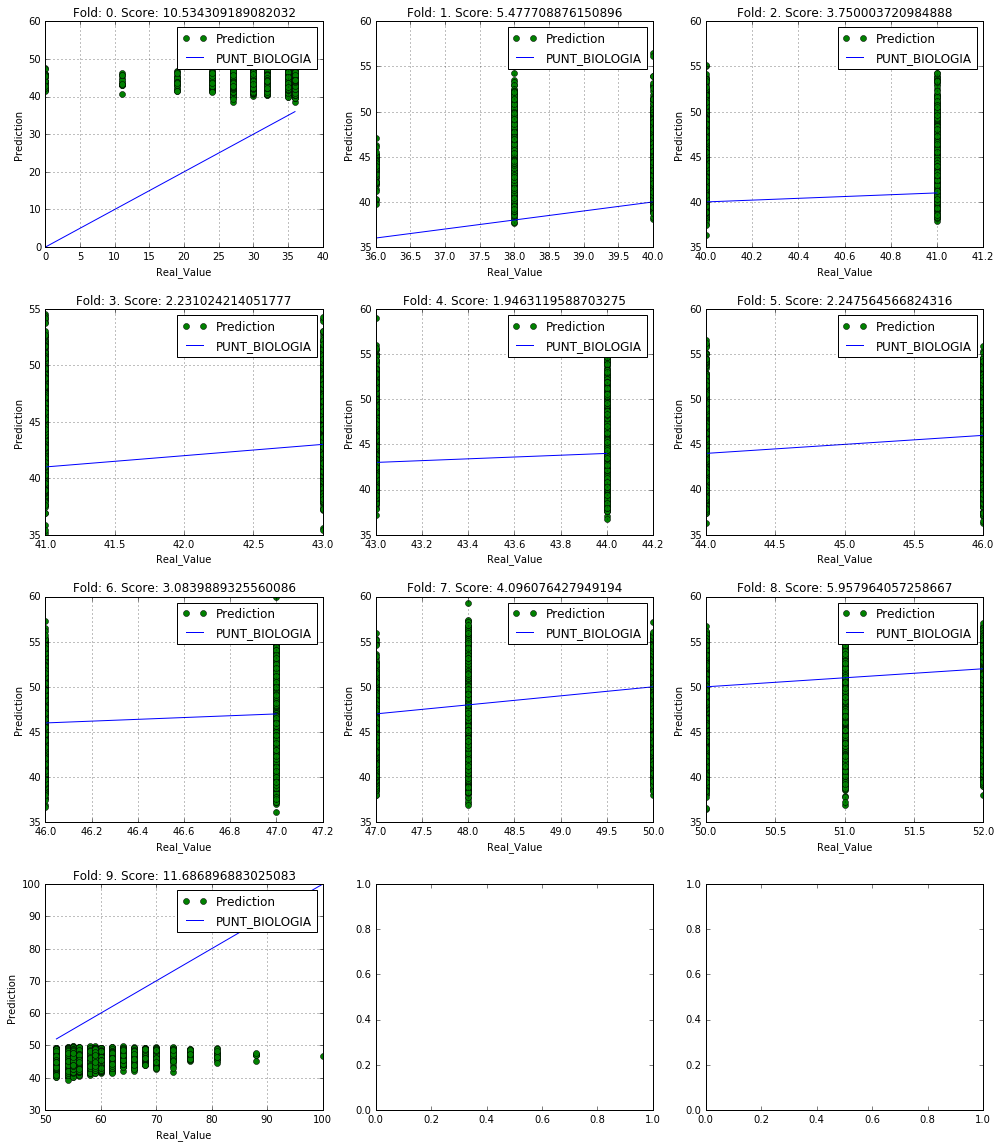

In [63]:
kf = KFold(X.shape[0], n_folds=10)
Lm = LinearRegression()
plot_predictions_KF(Lm, 'PUNT_BIOLOGIA', X, Y, kf)

#### Try with KFOLD = 5 and SHUFFLE = True

Mean Score: 4.43226003544


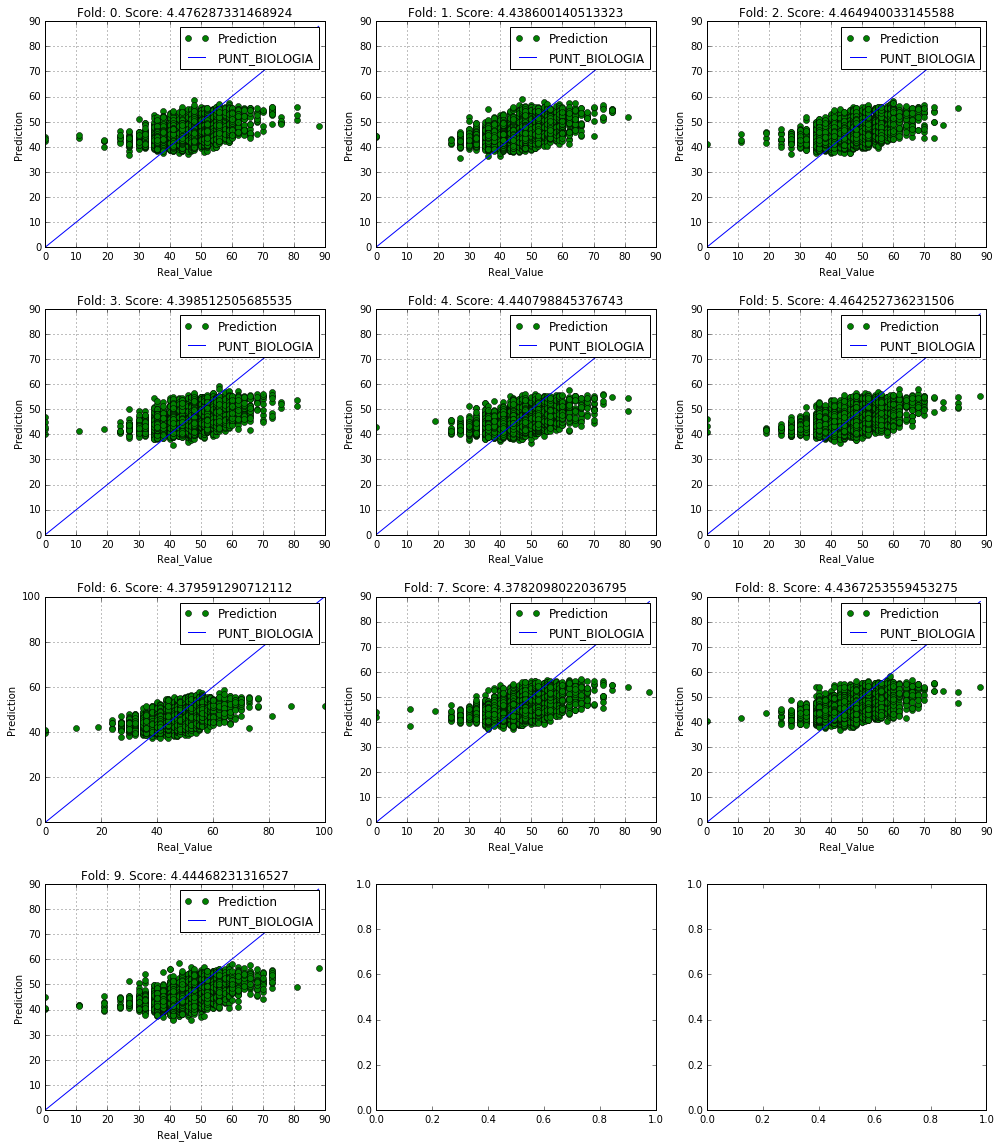

In [64]:
kf = KFold(X.shape[0], n_folds=5, shuffle=True)
Lm = LinearRegression()
plot_predictions_KF(Lm, 'PUNT_BIOLOGIA', X, Y, kf)

#### Try with ShuffleSplit = 5, Test Size = 0.2

Mean Score: 4.42904853063


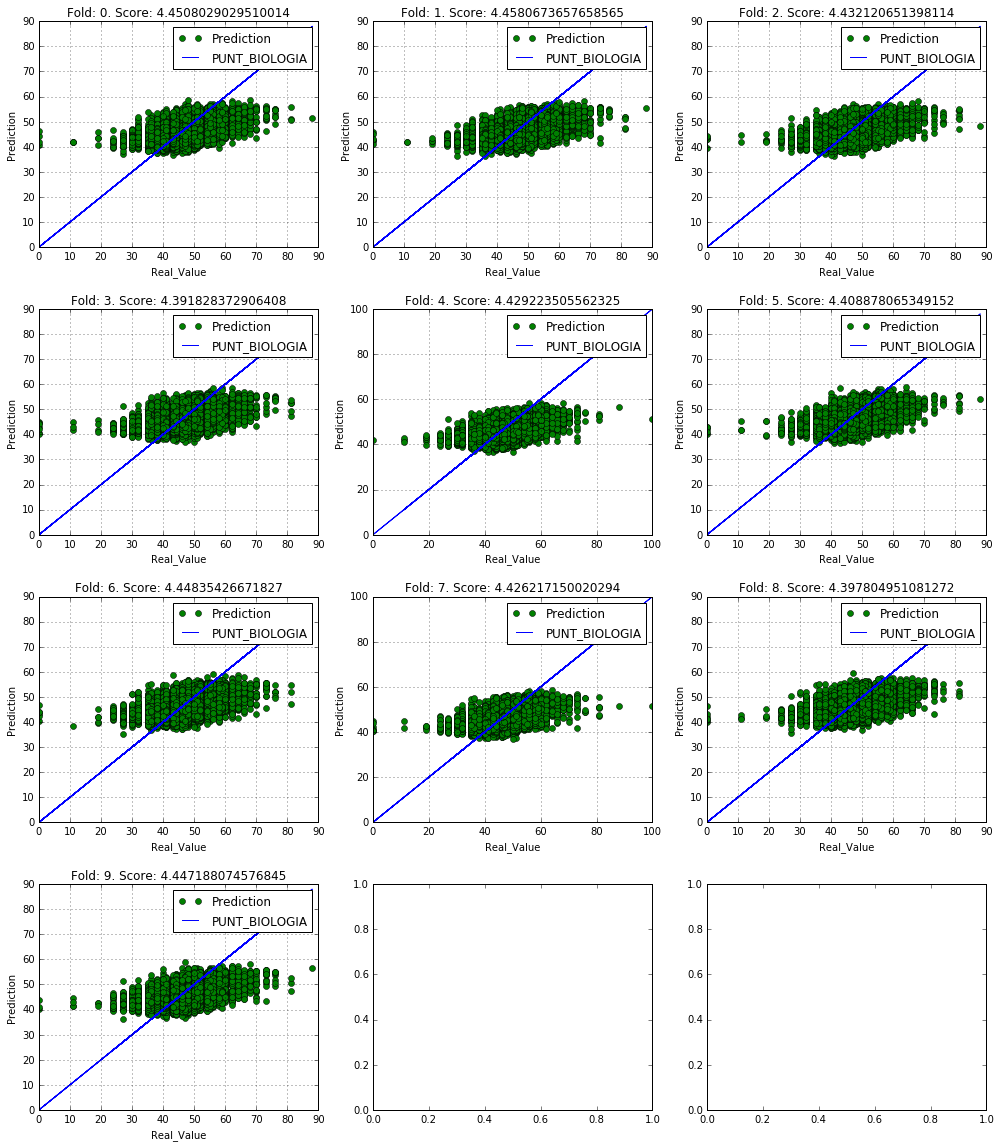

In [70]:
rs = ShuffleSplit(n = X.shape[0], n_iter=5, test_size=0.2)
Lr = LinearRegression()
plot_predictions_KF(Lr, 'PUNT_BIOLOGIA', X, Y, rs)

## Polynomial

The Model with the Data raised to the power of 2 gives:
Mean Score: 5.83478672837


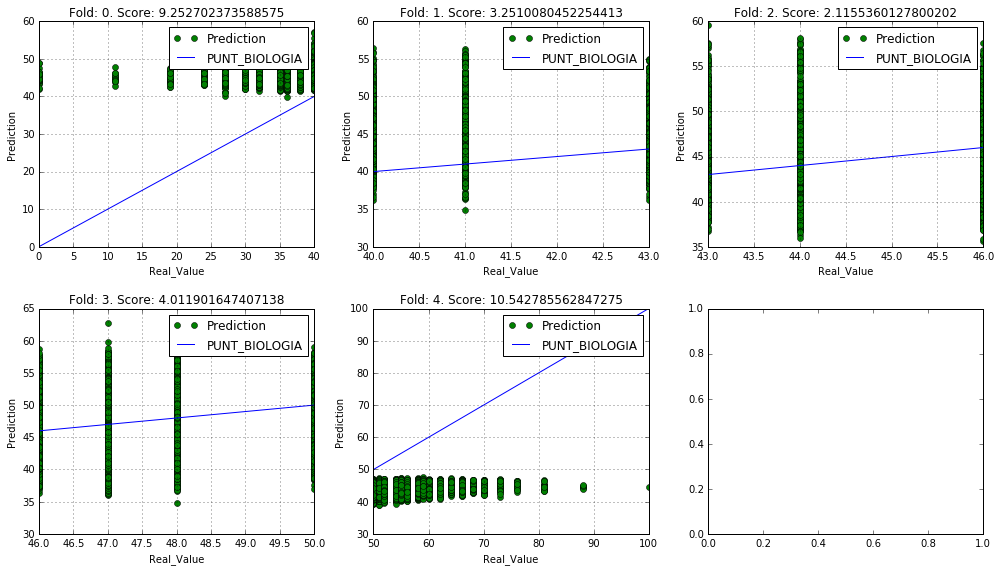

In [79]:
Lr = LinearRegression()
get_exp_prediction(Lr, 2, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the Data raised to the power of 2 gives:
Mean Score: 4.44798684126


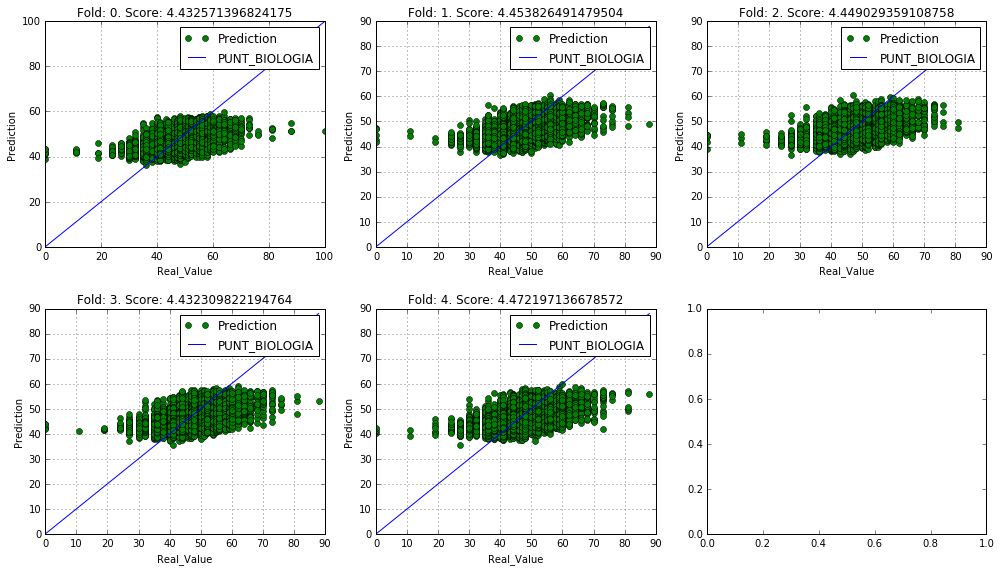

In [85]:
Lr = LinearRegression()
get_exp_prediction(Lr, 2, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle = True)

The Model with the Data raised to the power of 2 gives:
Mean Score: 4.43441843504


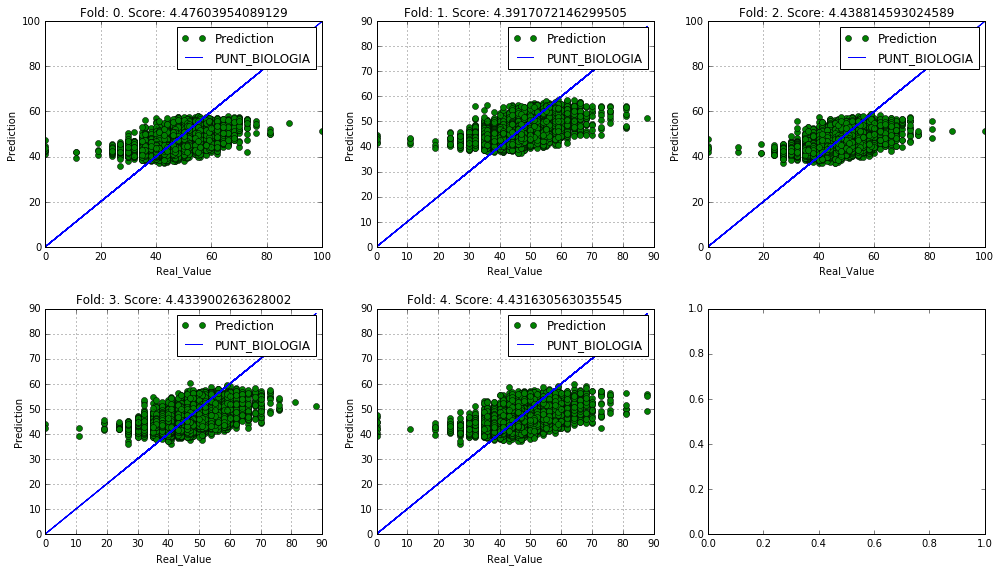

In [88]:
Lr = LinearRegression()
get_exp_prediction(Lr, 2, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split=True )

Now with 3

The Model with the Data raised to the power of 3 gives:
Mean Score: 5.87378055775


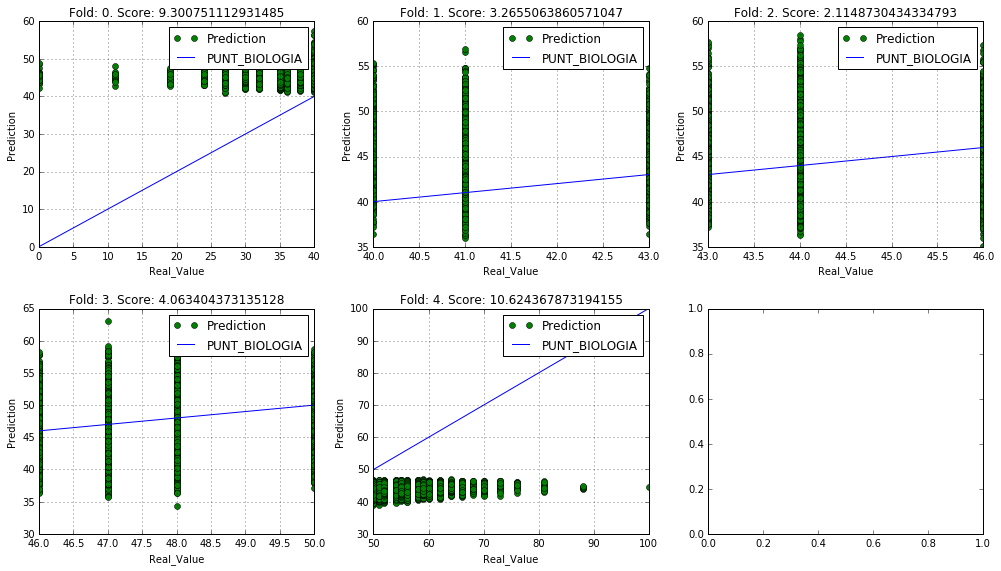

In [89]:
Lr = LinearRegression()
get_exp_prediction(Lr, 3, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the Data raised to the power of 3 gives:
Mean Score: 4.47857058232


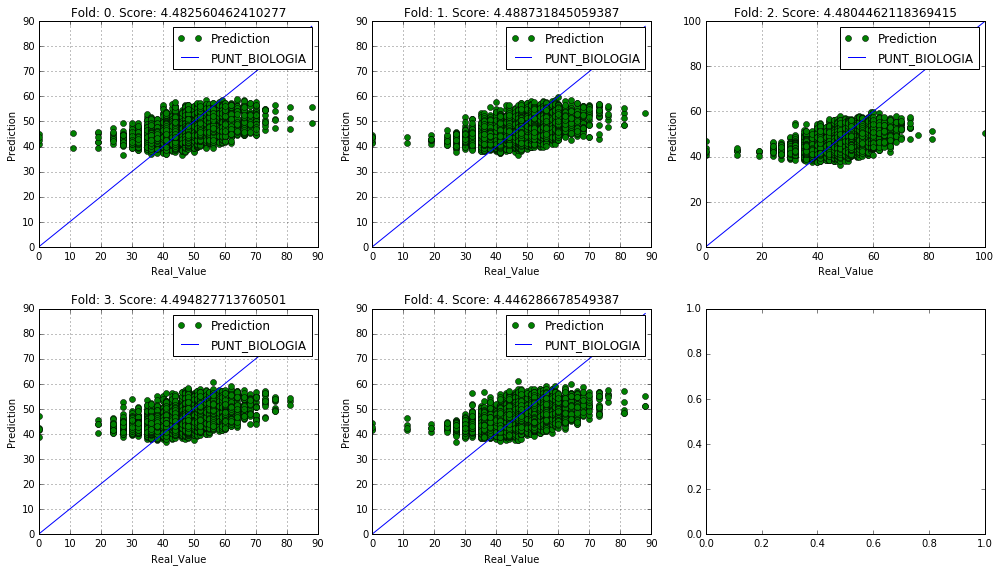

In [90]:
# Con KFolds pero shuffle: True
Lr = LinearRegression()
get_exp_prediction(Lr, 3, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle = True)

The Model with the Data raised to the power of 3 gives:
Mean Score: 4.47526156406


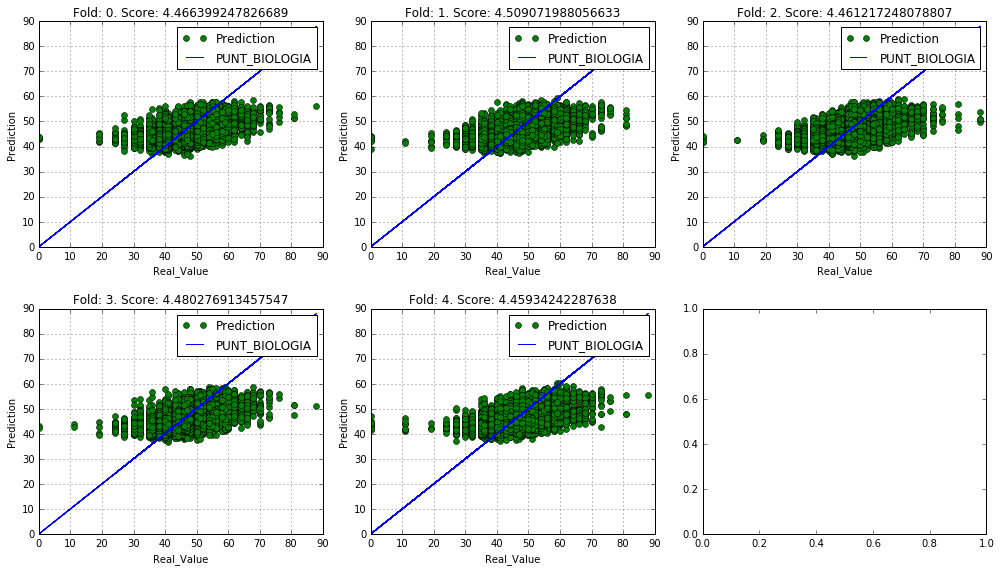

In [92]:
#Con ShuffleSplit
Lr = LinearRegression()
get_exp_prediction(Lr, 3, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split = True)

### Polynomial Features
Now i will try with Polynomial Features

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 13.634885235
The prediction took: 62.64280319213867 seconds


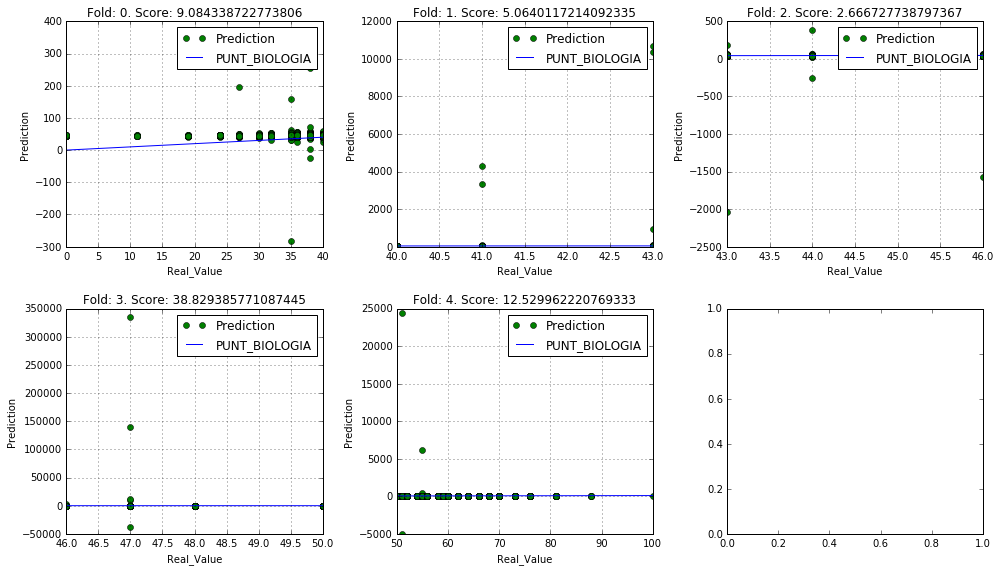

In [115]:
Lr = LinearRegression()
get_Poly_prediction(Lr, 2, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 8.30500891981
The prediction took: 62.29871416091919 seconds


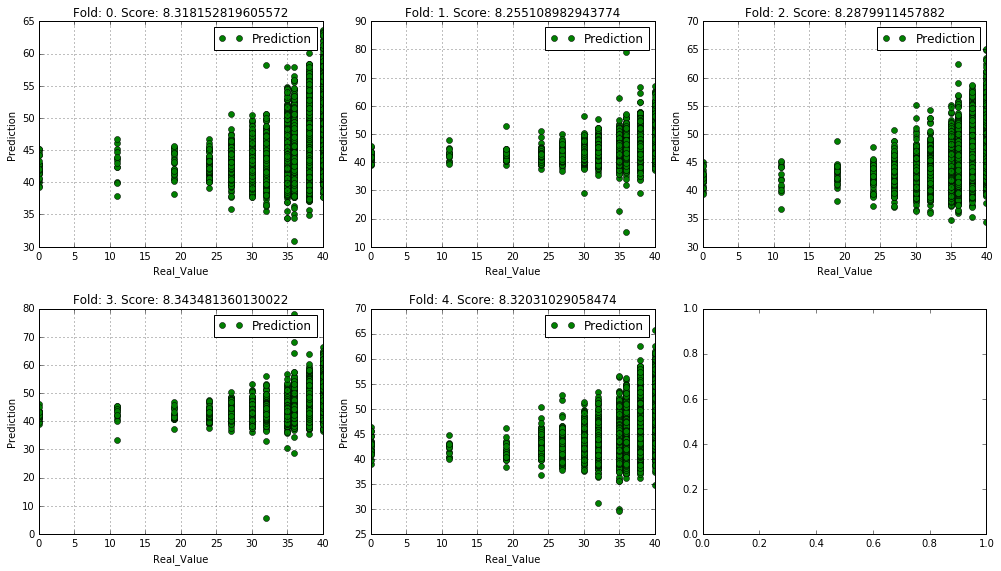

In [126]:
Lr = LinearRegression()
get_Poly_prediction(Lr, 2, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle=True)

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 8.29909317252
The prediction took: 62.52335453033447 seconds


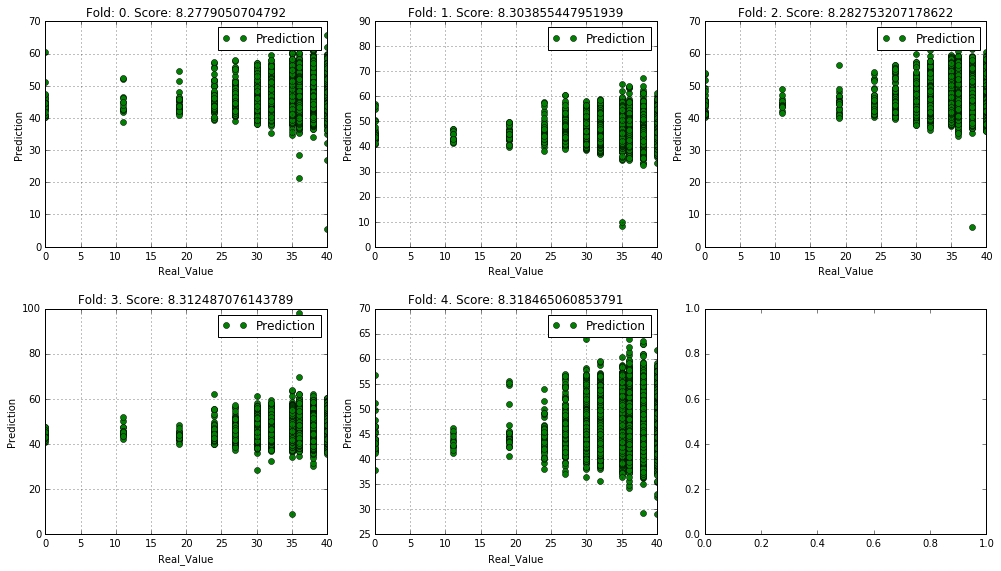

In [125]:
Lr = LinearRegression()
get_Poly_prediction(Lr, 2, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split=True)

Con degree 3

The Model with the new "PolyData" with degree 3 gives:
Mean Score: 8.80831507342
The prediction took: 12926.196598529816 seconds


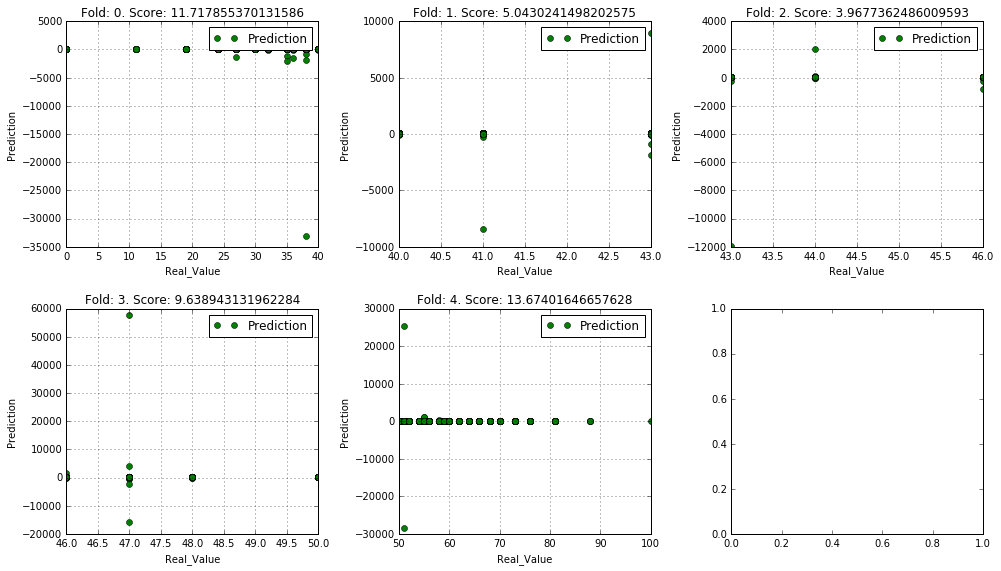

In [4]:
Lr = LinearRegression()
get_Poly_prediction(Lr, 3, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the new "PolyData" with degree 3 gives:
Mean Score: 9.35531349276
The prediction took: 11519.384715557098 seconds


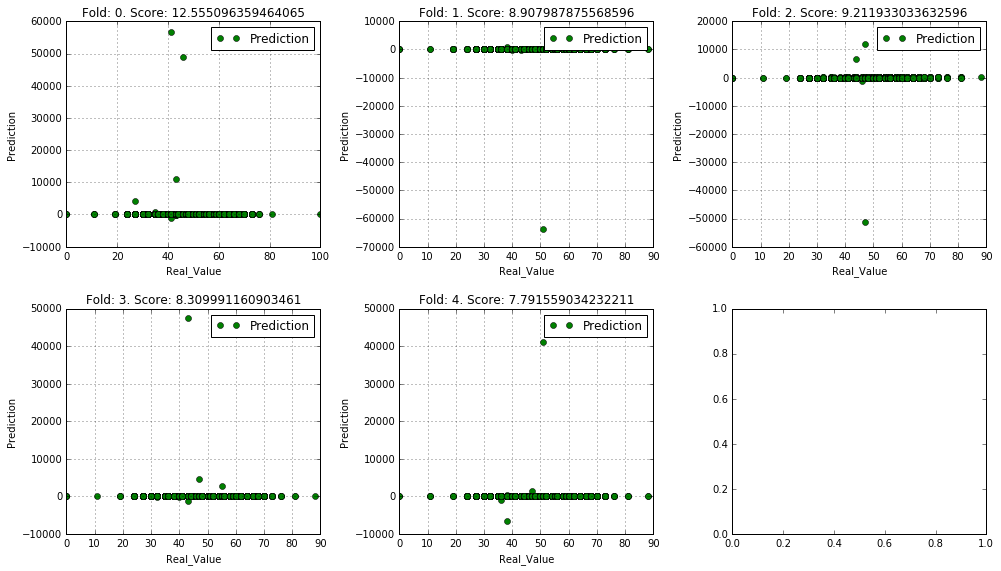

In [120]:
Lr = LinearRegression()
get_Poly_prediction(Lr, 3, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle=True)

The Model with the new "PolyData" with degree 3 gives:
Mean Score: 8.44745602926
The prediction took: 20829.57226252556 seconds


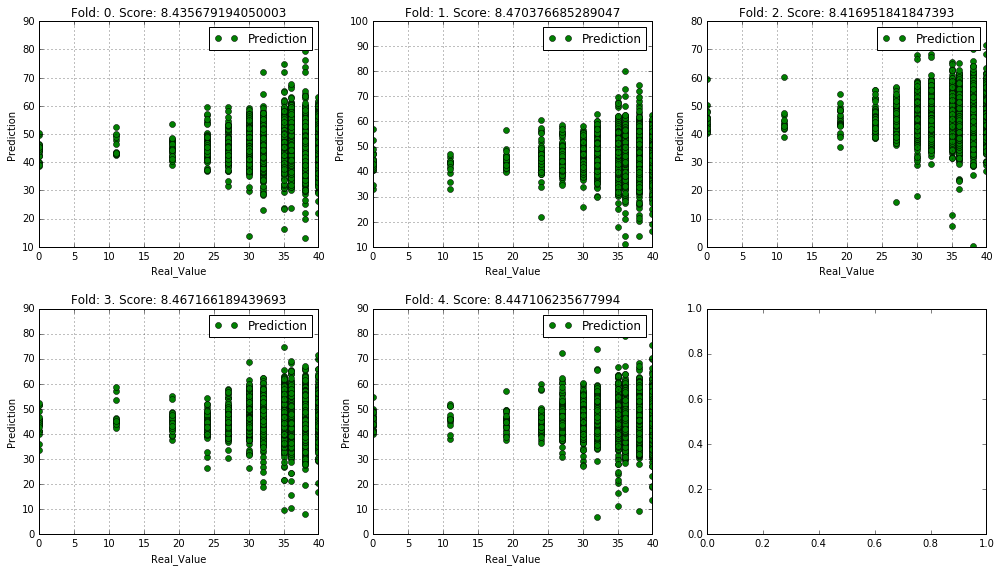

In [9]:
Lr = LinearRegression()
get_Poly_prediction(Lr, 3, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split=True)